In [ ]:
from google.colab import drive #import thư mục trong Google Drive vào Colab
drive.mount('/content/drive') #mount vào thư mục content

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as st
from sklearn.cluster import KMeans, DBSCAN
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from itertools import combinations as comb
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.feature_selection import mutual_info_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, f1_score, recall_score, precision_score
from sklearn.tree import DecisionTreeClassifier

# Đọc và phân tích cơ bản cho dữ liệu training

In [ ]:
# read training and test data
df = pd.read_csv("/content/drive/MyDrive/Cá nhân/TLS/Môn học/Khai phá dữ liệu/Khai phá dữ liệu - Phân loại Breast Cancer/Credit-score/credit-score-train.csv", low_memory=False)

In [ ]:
# print training data
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [ ]:
# Check xem data có giá trị null không ?
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [ ]:
# Mô tả data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


In [ ]:
# Mo ta kieu du lieu object
df.select_dtypes('object').describe().T

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


In [ ]:
# Loại bỏ các ký tự đặc biệt 
df = df.applymap(lambda x: x if x is np.NaN or not isinstance(x, str) else 
                 str(x).strip('_ ,"')).replace(['',
                                                '_',
                                                '-', 
                                                '-333333333333333333333333333'
                                                ,'nan', 
                                                '__10000__',
                                                '!@9#%8', 
                                                '#F%$D@*&8'], np.NaN)

In [ ]:
# Làm sạch cột Age
df['Age'] = df.Age.str.replace('-', '')

In [ ]:
# Làm tròn một số cột thành 2 chữ số thập phân, 
# nhưng trước tiên chúng ta chuyển đổi nó từ object sang float
df['Monthly_Balance'] = df.Monthly_Balance.astype(float)
df['Amount_invested_monthly'] = df.Amount_invested_monthly.astype(float)
df['Total_EMI_per_month'] = df.Total_EMI_per_month.astype(float)
df['Credit_Utilization_Ratio'] = df.Credit_Utilization_Ratio.astype(float)
df['Monthly_Inhand_Salary'] = df.Monthly_Inhand_Salary.astype(float)
df['Annual_Income'] = df.Annual_Income.astype(float)
df['Outstanding_Debt'] = df.Outstanding_Debt.astype(float)
df['Age'] = df.Age.astype(float)
df['Num_of_Loan'] =df['Num_of_Loan'].astype(int)
df['Num_of_Delayed_Payment'] =df['Num_of_Delayed_Payment'].astype(float)
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].astype(float)
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].astype(float)

# Làm tròn các giá trị thành hai chữ số thập phân
df['Monthly_Inhand_Salary']= df['Monthly_Inhand_Salary'].round(2)
df['Monthly_Balance'] = df['Monthly_Balance'].round(decimals = 2)
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].round(decimals = 2)
df['Total_EMI_per_month'] = df['Total_EMI_per_month'].round(decimals = 2)
df['Credit_Utilization_Ratio'] =  df['Credit_Utilization_Ratio'].round(decimals = 2)
df['Monthly_Inhand_Salary'] = df['Monthly_Inhand_Salary'].round(decimals = 2)
df['Annual_Income'] = df['Annual_Income'].round(decimals = 2)

In [ ]:
# Làm sạch cột Credit_History_Age
df['Credit_History_Age'] = df['Credit_History_Age'].str[:2]+""+df['Credit_History_Age'].str[13:15]
print(df['Credit_History_Age'])

0        221 
1         NaN
2        223 
3        224 
4        225 
         ... 
99995    316 
99996    317 
99997    318 
99998    319 
99999    3110
Name: Credit_History_Age, Length: 100000, dtype: object


In [ ]:
# Làm sạch cột Age, xóa các giá trị ngoại lệ và thay thế các ký tự bằng giá trị trung bình của các giá trị Age
for i in df.Age.values:
    if i > 118:
        df.Age.replace(i, np.median(df.Age), inplace=True)
              
# Thay thế mục nhập không nhất quán trong cột Age
df.Age.replace(-500, np.median(df.Age), inplace=True)
for i in df.Age.values:
    if i > 118:
        df.Age.replace(i, np.median(df.Age), inplace=True)

In [ ]:
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.84,3,...,NaN,809.98,26.82,221,No,49.57,80.42,High_spent_Small_value_payments,312.49,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.94,NaN,No,49.57,118.28,Low_spent_Large_value_payments,284.63,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,34.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.61,223,No,49.57,81.70,Low_spent_Medium_value_payments,331.21,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.38,224,No,49.57,199.46,Low_spent_Small_value_payments,223.45,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.84,3,...,Good,809.98,24.80,225,No,49.57,41.42,High_spent_Medium_value_payments,341.49,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.42,4,...,NaN,502.38,34.66,316,No,35.10,60.97,High_spent_Large_value_payments,479.87,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.42,4,...,NaN,502.38,40.57,317,No,35.10,54.19,High_spent_Medium_value_payments,496.65,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.42,4,...,Good,502.38,41.26,318,No,35.10,24.03,High_spent_Large_value_payments,516.81,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.42,4,...,Good,502.38,33.64,319,No,35.10,251.67,Low_spent_Large_value_payments,319.16,Standard


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  float64
 5   SSN                       94428 non-null   object 
 6   Occupation                92938 non-null   object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int64  
 13  Type_of_Loan              88592 non-null   ob

In [ ]:
# xóa các cột ID, Customer_ID, Name, SSN
drop1 = ['ID','Customer_ID','Name','SSN']
df.drop(drop1,axis=1,inplace=True)

In [ ]:
df_num = df.select_dtypes('number').columns
df_cat = df.select_dtypes('object').columns

In [ ]:
df_num

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')

In [ ]:
df_cat

Index(['Month', 'Occupation', 'Type_of_Loan', 'Credit_Mix',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Payment_Behaviour',
       'Credit_Score'],
      dtype='object')

# Exploratory Data Analysis

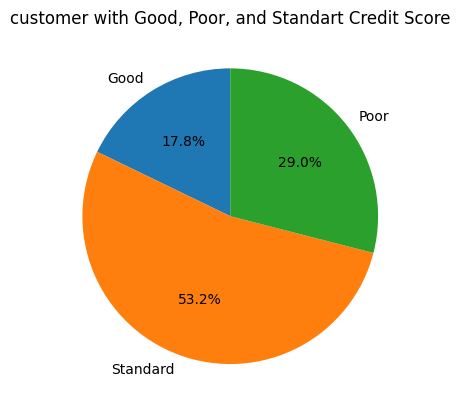

In [ ]:
data = [df[df['Credit_Score']=='Good']['Credit_Score'].count(),
        df[df['Credit_Score']=='Standard']['Credit_Score'].count(),
       df[df['Credit_Score']=='Poor']['Credit_Score'].count()]
categori = ['Good','Standard','Poor']

plt.pie(data,
        labels=categori,
        autopct='%1.1f%%',
        startangle=90)

plt.title('customer with Good, Poor, and Standart Credit Score')

plt.show()

## Phân tích đơn biến

In [ ]:
def outlier(x):
    q1 = np.nanpercentile(x, 25)
    q3 = np.nanpercentile(x, 75)
    iqr = q3 - q1
    lower_fence = q1 - 1.5 * iqr
    upper_fence = q3 + 1.5 * iqr
    
    # nhận dạng không ngoại lệ bằng cách sử dụng hàng rào dưới và trên
    non_outlier = []
    for num in x:
        if num >= lower_fence:
            if num <= upper_fence:
                non_outlier.append(num)
    lower_whisker = np.min(non_outlier)
    upper_whisker = np.max(non_outlier)
    
    # xác định các ngoại lệ bằng cách sử dụng hàng rào dưới và trên
    outlier = []
    for num in x:
        if num < lower_fence:
            outlier.append(num)
        if num > upper_fence:
            outlier.append(num)
    
    outlier_count = len(outlier)
    
    print('lower_whisker: {}'.format(lower_whisker))
    print('upper_whisker: {}'.format(upper_whisker))
    print('outlier counts: {}'.format(outlier_count))

1. Age


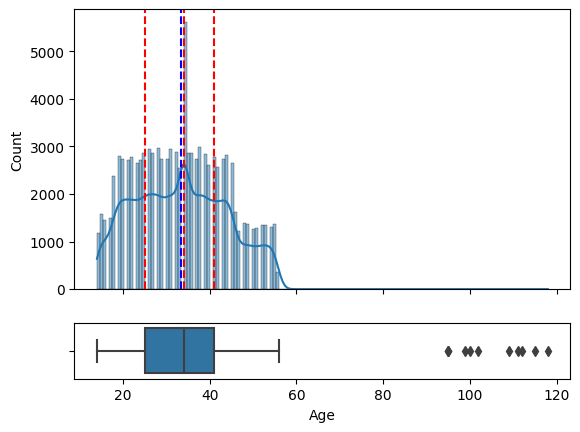

 
count    100000.000000
mean         33.346690
std          10.645975
min          14.000000
25%          25.000000
50%          34.000000
75%          41.000000
max         118.000000
Name: Age, dtype: float64
 
lower_whisker: 14.0
upper_whisker: 56.0
outlier counts: 11
 
Data skewed with skew is 23.48437461200452
 
Data not normal
--------------------------------------------------
 
2. Annual_Income


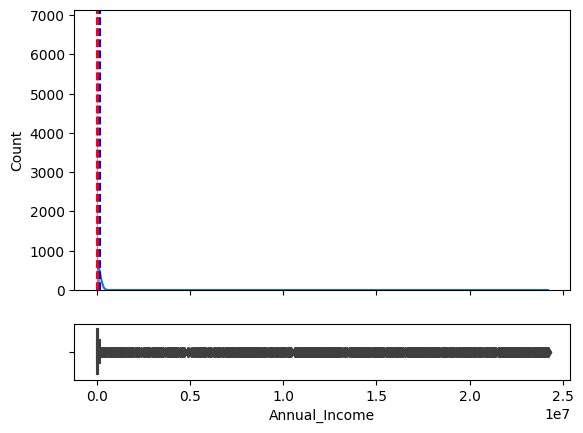

 
count    1.000000e+05
mean     1.764157e+05
std      1.429618e+06
min      7.005930e+03
25%      1.945750e+04
50%      3.757861e+04
75%      7.279092e+04
max      2.419806e+07
Name: Annual_Income, dtype: float64
 
lower_whisker: 7005.93
upper_whisker: 152574.76
outlier counts: 2783
 
Data skewed with skew is 360.9380837600788
 
Data not normal
--------------------------------------------------
 
3. Monthly_Inhand_Salary


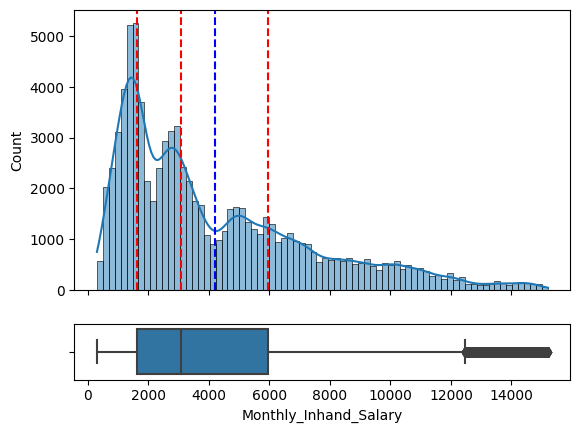

 
count    84998.000000
mean      4194.170823
std       3183.686134
min        303.650000
25%       1625.570000
50%       3093.750000
75%       5957.450000
max      15204.630000
Name: Monthly_Inhand_Salary, dtype: float64
 
lower_whisker: 303.65
upper_whisker: 12452.33
outlier counts: 1683
 
Data not skewed
 
Data normal
--------------------------------------------------
 
4. Num_Bank_Accounts


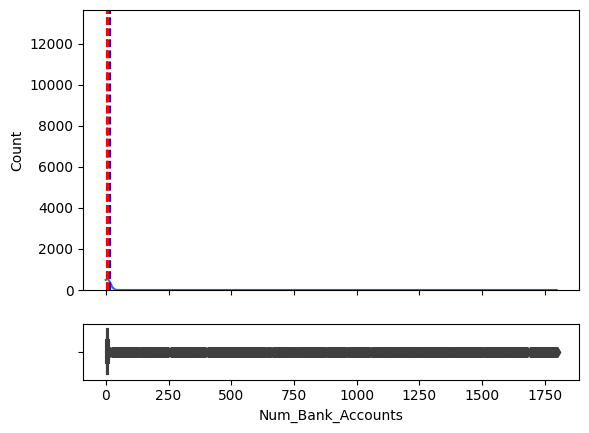

 
count    100000.000000
mean         17.091280
std         117.404834
min          -1.000000
25%           3.000000
50%           6.000000
75%           7.000000
max        1798.000000
Name: Num_Bank_Accounts, dtype: float64
 
lower_whisker: -1
upper_whisker: 11
outlier counts: 1315
 
Data skewed with skew is 349.3088391701702
 
Data not normal
--------------------------------------------------
 
5. Num_Credit_Card


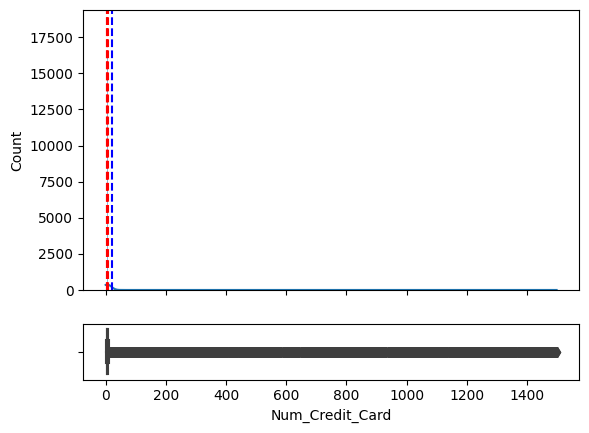

 
count    100000.00000
mean         22.47443
std         129.05741
min           0.00000
25%           4.00000
50%           5.00000
75%           7.00000
max        1499.00000
Name: Num_Credit_Card, dtype: float64
 
lower_whisker: 0
upper_whisker: 11
outlier counts: 2271
 
Data skewed with skew is 319.7861603939238
 
Data not normal
--------------------------------------------------
 
6. Interest_Rate


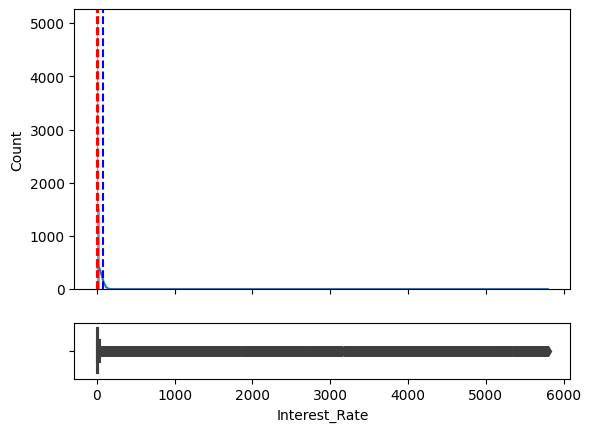

 
count    100000.000000
mean         72.466040
std         466.422621
min           1.000000
25%           8.000000
50%          13.000000
75%          20.000000
max        5797.000000
Name: Interest_Rate, dtype: float64
 
lower_whisker: 1
upper_whisker: 34
outlier counts: 2034
 
Data skewed with skew is 326.37598267821016
 
Data not normal
--------------------------------------------------
 
7. Num_of_Loan


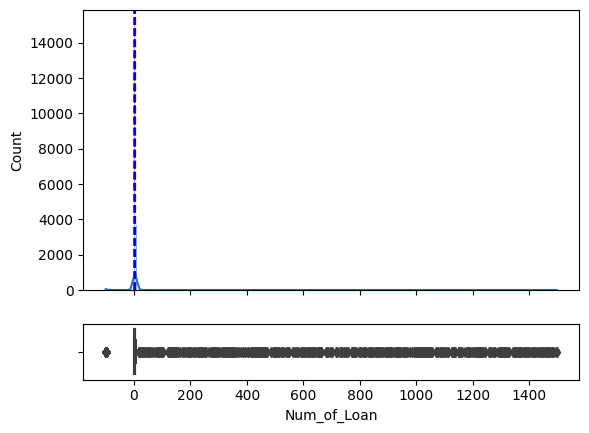

 
count    100000.000000
mean          3.009960
std          62.647879
min        -100.000000
25%           1.000000
50%           3.000000
75%           5.000000
max        1496.000000
Name: Num_of_Loan, dtype: float64
 
lower_whisker: 0
upper_whisker: 9
outlier counts: 4348
 
Data skewed with skew is 386.68680539403914
 
Data not normal
--------------------------------------------------
 
8. Delay_from_due_date


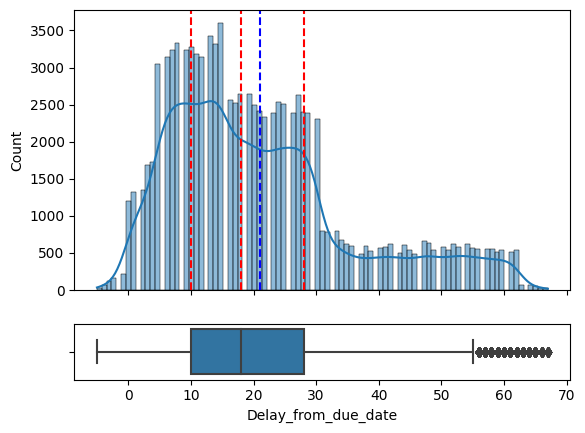

 
count    100000.000000
mean         21.068780
std          14.860104
min          -5.000000
25%          10.000000
50%          18.000000
75%          28.000000
max          67.000000
Name: Delay_from_due_date, dtype: float64
 
lower_whisker: -5
upper_whisker: 55
outlier counts: 4002
 
Data skewed with skew is 105.99050185996936
 
Data not normal
--------------------------------------------------
 
9. Num_of_Delayed_Payment


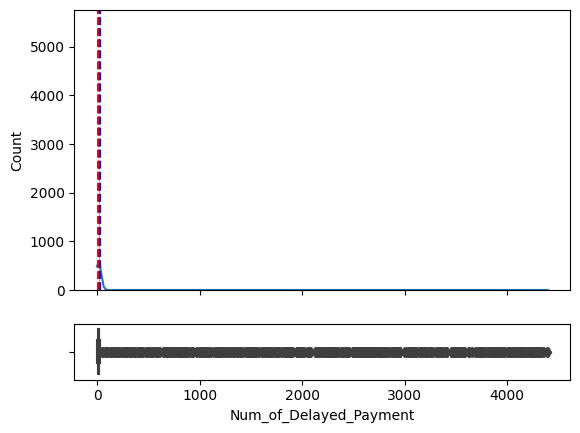

 
count    92998.000000
mean        30.923342
std        226.031892
min         -3.000000
25%          9.000000
50%         14.000000
75%         18.000000
max       4397.000000
Name: Num_of_Delayed_Payment, dtype: float64
 
lower_whisker: -3.0
upper_whisker: 28.0
outlier counts: 736
 
Data not skewed
 
Data normal
--------------------------------------------------
 
10. Changed_Credit_Limit


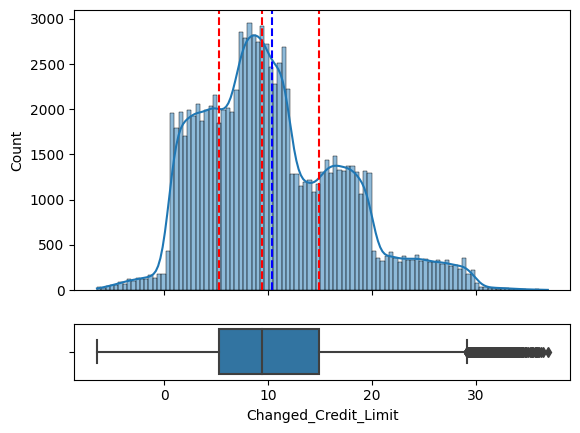

 
count    97909.000000
mean        10.389025
std          6.789496
min         -6.490000
25%          5.320000
50%          9.400000
75%         14.870000
max         36.970000
Name: Changed_Credit_Limit, dtype: float64
 
lower_whisker: -6.49
upper_whisker: 29.19
outlier counts: 668
 
Data not skewed
 
Data normal
--------------------------------------------------
 
11. Num_Credit_Inquiries


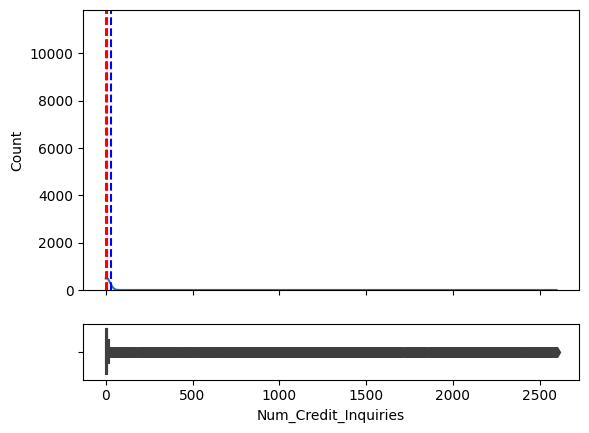

 
count    98035.000000
mean        27.754251
std        193.177339
min          0.000000
25%          3.000000
50%          6.000000
75%          9.000000
max       2597.000000
Name: Num_Credit_Inquiries, dtype: float64
 
lower_whisker: 0.0
upper_whisker: 17.0
outlier counts: 1650
 
Data not skewed
 
Data normal
--------------------------------------------------
 
12. Outstanding_Debt


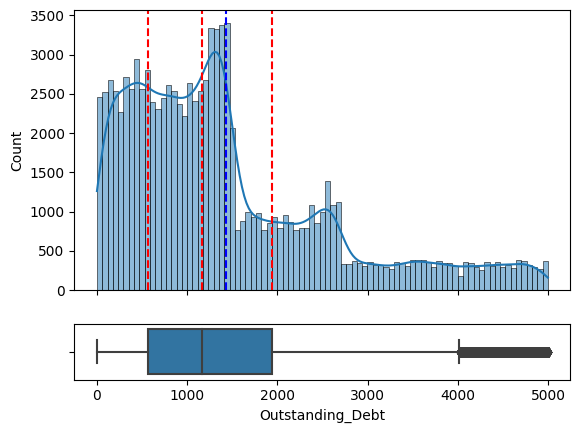

 
count    100000.000000
mean       1426.220376
std        1155.129026
min           0.230000
25%         566.072500
50%        1166.155000
75%        1945.962500
max        4998.070000
Name: Outstanding_Debt, dtype: float64
 
lower_whisker: 0.23
upper_whisker: 4014.35
outlier counts: 5272
 
Data skewed with skew is 124.71298394690707
 
Data not normal
--------------------------------------------------
 
13. Credit_Utilization_Ratio


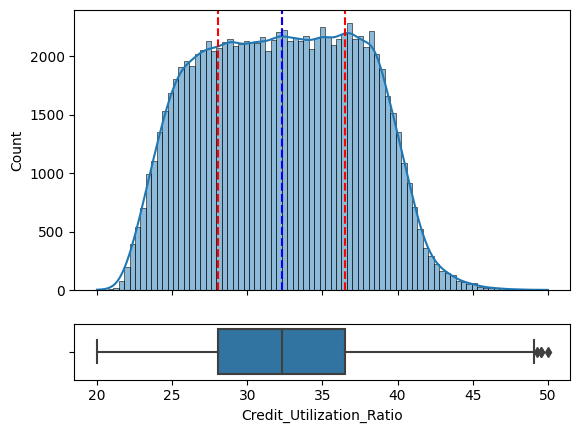

 
count    100000.000000
mean         32.285184
std           5.116880
min          20.000000
25%          28.050000
50%          32.310000
75%          36.500000
max          50.000000
Name: Credit_Utilization_Ratio, dtype: float64
 
lower_whisker: 20.0
upper_whisker: 49.06
outlier counts: 4
 
Data skewed with skew is 3.693823012013264
 
Data not normal
--------------------------------------------------
 
14. Total_EMI_per_month


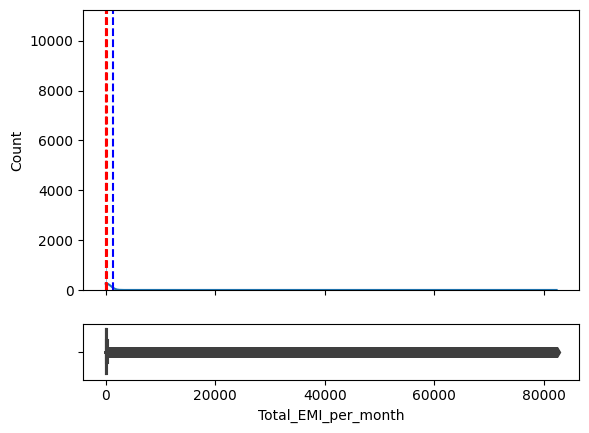

 
count    100000.000000
mean       1403.118254
std        8306.041264
min           0.000000
25%          30.310000
50%          69.250000
75%         161.220000
max       82331.000000
Name: Total_EMI_per_month, dtype: float64
 
lower_whisker: 0.0
upper_whisker: 357.41
outlier counts: 6795
 
Data skewed with skew is 301.4733280484761
 
Data not normal
--------------------------------------------------
 
15. Amount_invested_monthly


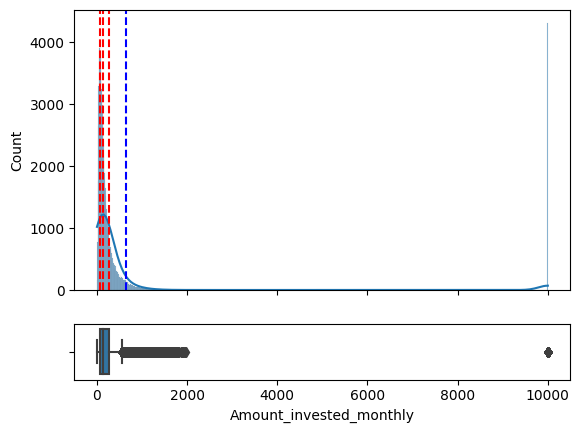

 
count    95521.000000
mean       637.413012
std       2043.319326
min          0.000000
25%         74.530000
50%        135.930000
75%        265.730000
max      10000.000000
Name: Amount_invested_monthly, dtype: float64
 
lower_whisker: 0.0
upper_whisker: 552.51
outlier counts: 10096
 
Data not skewed
 
Data normal
--------------------------------------------------
 
16. Monthly_Balance


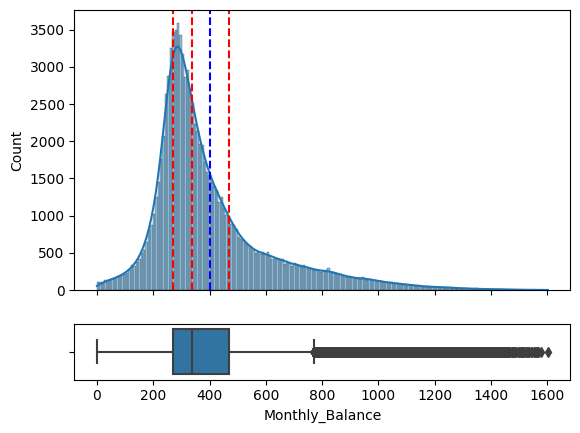

 
count    98791.000000
mean       402.551261
std        213.925513
min          0.010000
25%        270.110000
50%        336.730000
75%        470.265000
max       1602.040000
Name: Monthly_Balance, dtype: float64
 
lower_whisker: 0.01
upper_whisker: 770.41
outlier counts: 7627
 
Data not skewed
 
Data normal
--------------------------------------------------
 


In [ ]:
norm_data = []
for y,x in enumerate(df_num,1):
    print(f'{y}. {x}')
    fig, ax = plt.subplots(2,1, sharex=True, gridspec_kw={'height_ratios':[5,1]})
    sns.histplot(data=df, x=x, kde=True, ax=ax[0])
    ax[0].axvline(np.nanpercentile(df[x], 25), c='red',linestyle='--')
    ax[0].axvline(np.nanpercentile(df[x], 50), c='red',linestyle='--')
    ax[0].axvline(np.nanpercentile(df[x], 75), c='red',linestyle='--')
    ax[0].axvline(np.mean(df[x]), c='blue',linestyle='--')
    
    sns.boxplot(data=df, x=x, ax=ax[1])
    ax[1].set_xlabel(f'{x}')
    plt.show()
    print(' ')
    print(df[x].describe())
    print(' ')
    outlier(df[x])
    print(' ')
    sk, pval = st.skewtest(df[x])
    if pval < 0.05:
        print(f'Data skewed with skew is {sk}')
    else:
        print(f'Data not skewed')
    print(' ')
    norm, pval = st.normaltest(df[x])
    if pval < 0.05:
        print(f'Data not normal')
    else:
        print(f'Data normal')
        norm_data.append(x)
    print('-'*50)
    print(' ')

# Univariate analysis fo categorical

1. Month


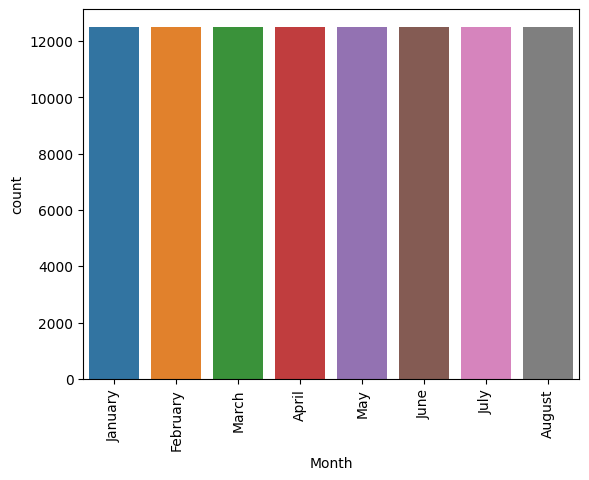

 
count      100000
unique          8
top       January
freq        12500
Name: Month, dtype: object
unique value: ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']
------------------------------------------------------------------------------------------
 
2. Occupation


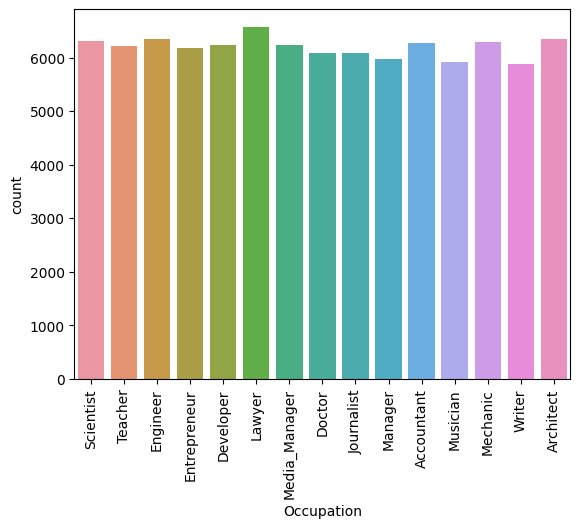

 
count      92938
unique        15
top       Lawyer
freq        6575
Name: Occupation, dtype: object
unique value: ['Scientist' nan 'Teacher' 'Engineer' 'Entrepreneur' 'Developer' 'Lawyer'
 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant' 'Musician'
 'Mechanic' 'Writer' 'Architect']
------------------------------------------------------------------------------------------
 
4. Credit_mix


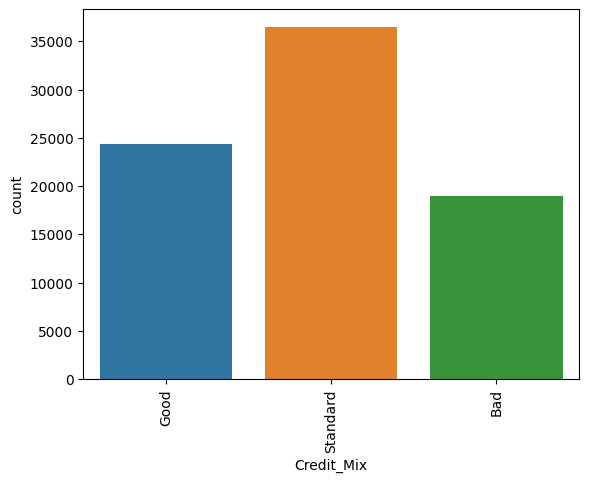

 
count        79805
unique           3
top       Standard
freq         36479
Name: Credit_Mix, dtype: object
unique value: [nan 'Good' 'Standard' 'Bad']
------------------------------------------------------------------------------------------
 
6. Payment_of_min_amount


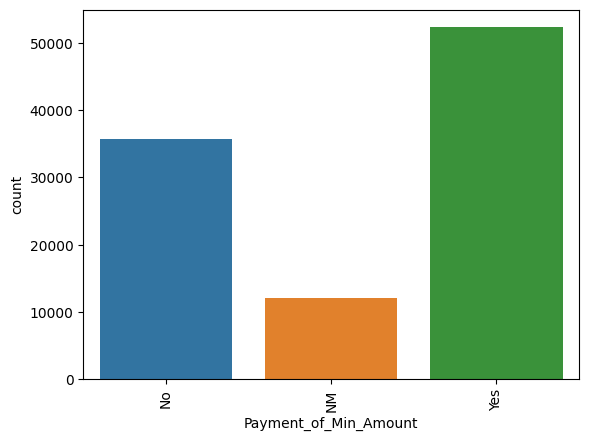

 
count     100000
unique         3
top          Yes
freq       52326
Name: Payment_of_Min_Amount, dtype: object
unique value: ['No' 'NM' 'Yes']
------------------------------------------------------------------------------------------
 
7. Payment_behaviour


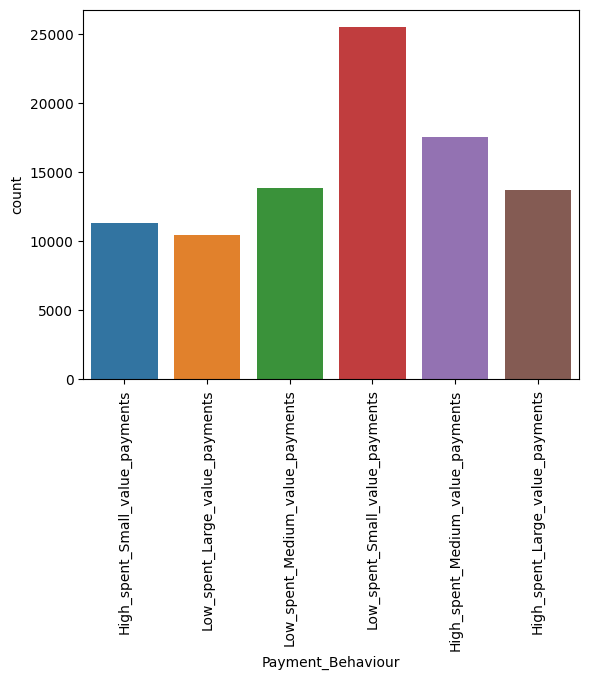

 
count                              92400
unique                                 6
top       Low_spent_Small_value_payments
freq                               25513
Name: Payment_Behaviour, dtype: object
unique value: ['High_spent_Small_value_payments' 'Low_spent_Large_value_payments'
 'Low_spent_Medium_value_payments' 'Low_spent_Small_value_payments'
 'High_spent_Medium_value_payments' nan 'High_spent_Large_value_payments']
------------------------------------------------------------------------------------------
 
8. Credit_score


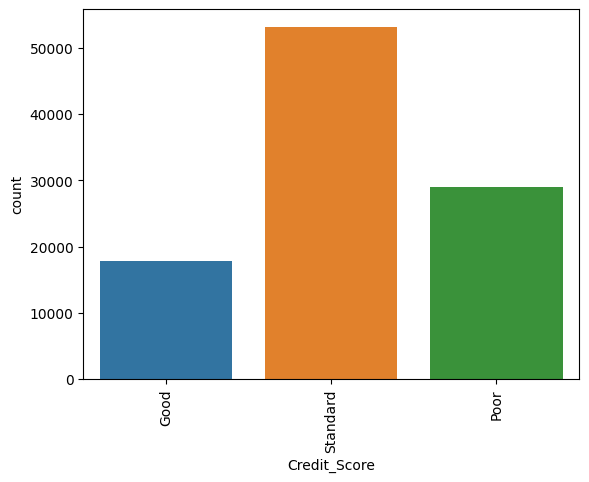

 
count       100000
unique           3
top       Standard
freq         53174
Name: Credit_Score, dtype: object
unique value: ['Good' 'Standard' 'Poor']
------------------------------------------------------------------------------------------
 


In [ ]:
cat = []
for num,x in enumerate(df_cat,1):
    if len(df[x].unique()) <= 16:
        print(f'{num}. {x.capitalize()}')
        sns.countplot(data=df, x=x)
        plt.xticks(rotation=90)
        plt.show()
        cat.append(x)
        print(' ')
        print(df[x].describe())
        print(f'unique value: {df[x].unique()}')
        print('-'*90)
        print(' ')

# Bivariate analysis for categorical

1. Credit_Score - Month


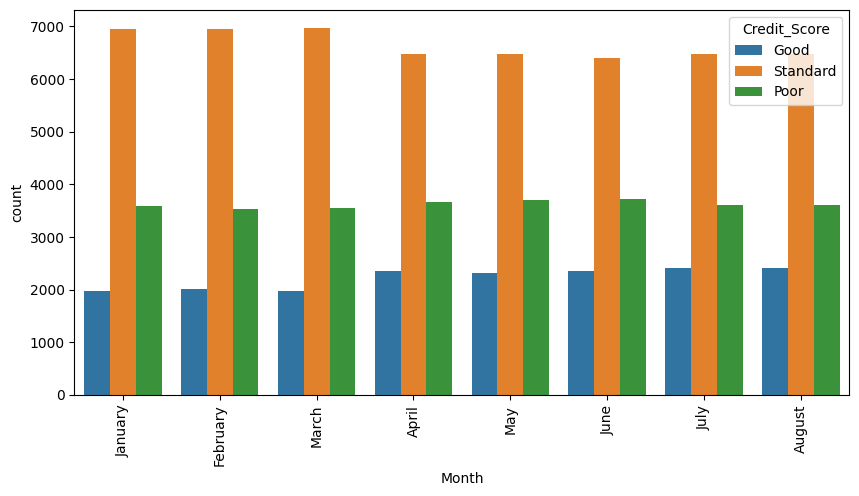

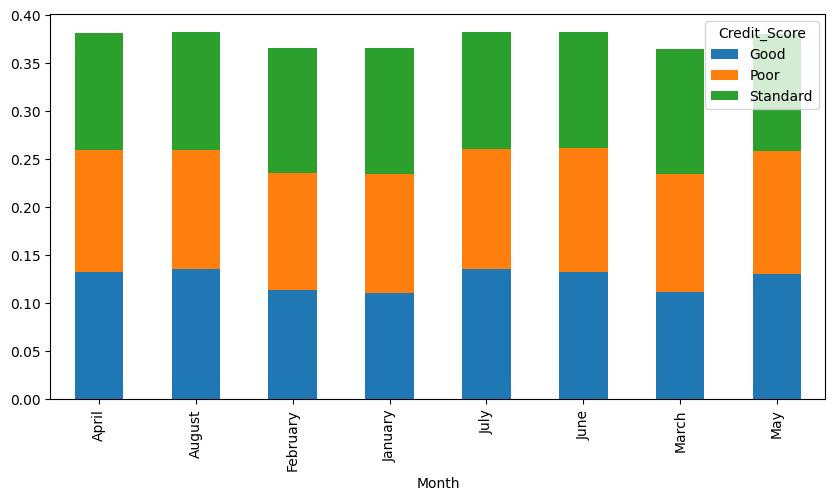

Credit_Score  Good_total  Poor_total  Standard_total  Good_percent  \
Month                                                                
April               2357        3670            6473          19.0   
August              2413        3602            6485          19.0   
February            2016        3539            6945          16.0   
January             1975        3582            6943          16.0   
July                2411        3614            6475          19.0   
June                2362        3728            6410          19.0   
March               1984        3551            6965          16.0   
May                 2310        3712            6478          18.0   

Credit_Score  Poor_percent  Standard_percent  
Month                                         
April                 29.0              52.0  
August                29.0              52.0  
February              28.0              56.0  
January               29.0              56.0  
July             

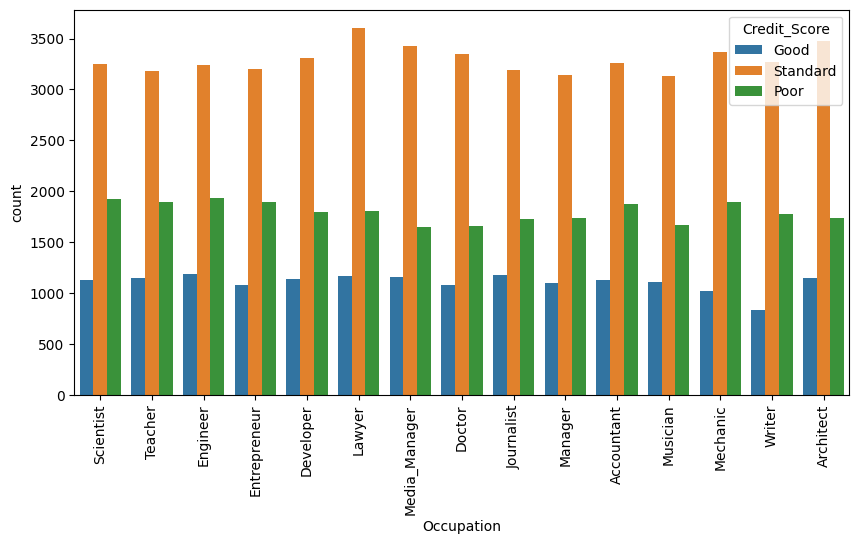

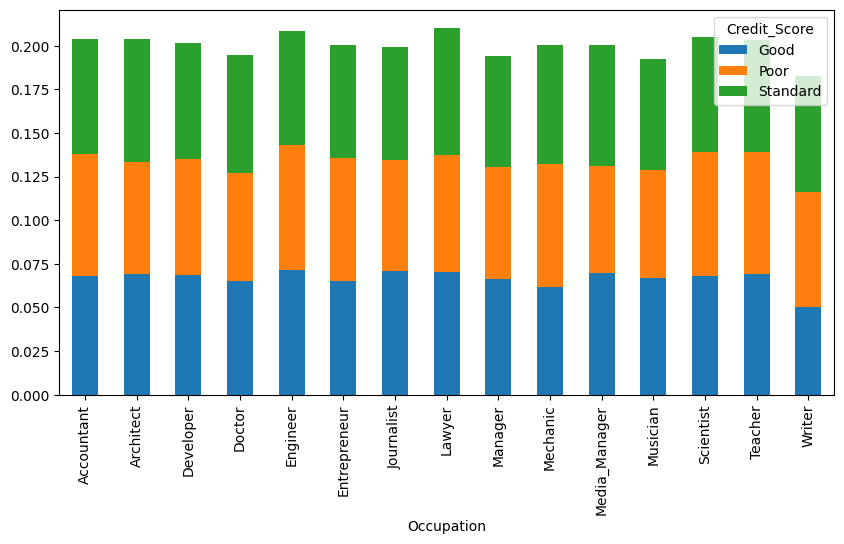

Credit_Score   Good_total  Poor_total  Standard_total  Good_percent  \
Occupation                                                            
Accountant           1128        1879            3264          18.0   
Architect            1144        1734            3477          18.0   
Developer            1134        1792            3309          18.0   
Doctor               1082        1661            3344          18.0   
Engineer             1182        1932            3236          19.0   
Entrepreneur         1080        1896            3198          17.0   
Journalist           1173        1725            3187          19.0   
Lawyer               1162        1810            3603          18.0   
Manager              1098        1732            3143          18.0   
Mechanic             1024        1896            3371          16.0   
Media_Manager        1161        1645            3426          19.0   
Musician             1110        1670            3131          19.0   
Scient

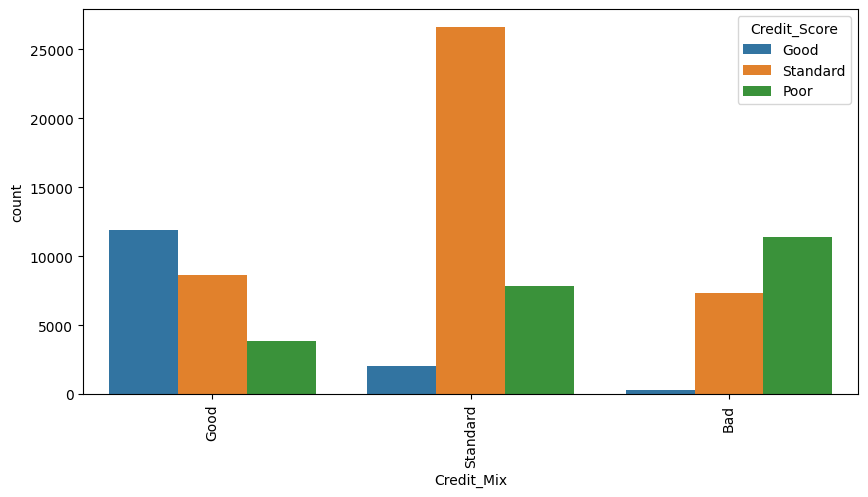

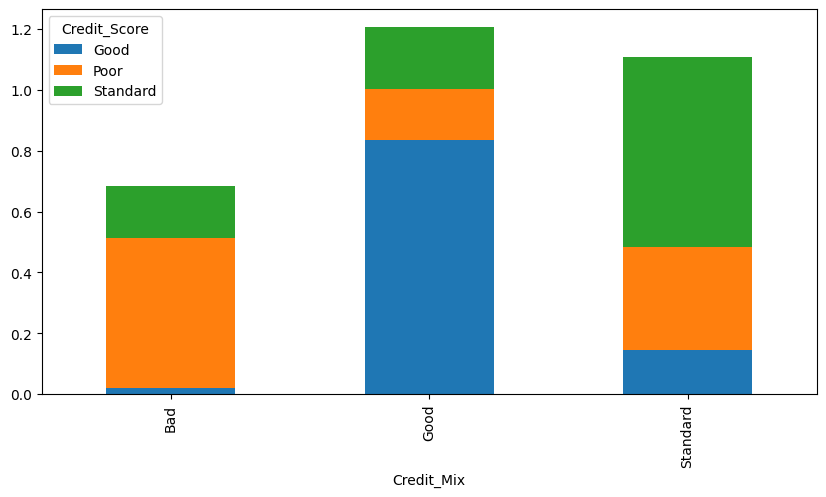

Credit_Score  Good_total  Poor_total  Standard_total  Good_percent  \
Credit_Mix                                                           
Bad                  288       11409            7292           2.0   
Good               11875        3861            8601          49.0   
Standard            2043        7859           26577           6.0   

Credit_Score  Poor_percent  Standard_percent  
Credit_Mix                                    
Bad                   60.0              38.0  
Good                  16.0              35.0  
Standard              22.0              73.0  
--------------------------------------------------
 
4. Credit_Score - Payment_of_Min_Amount


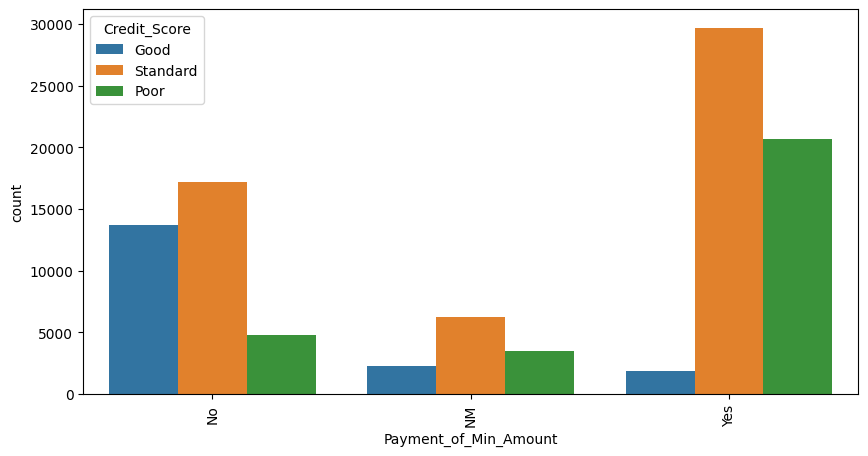

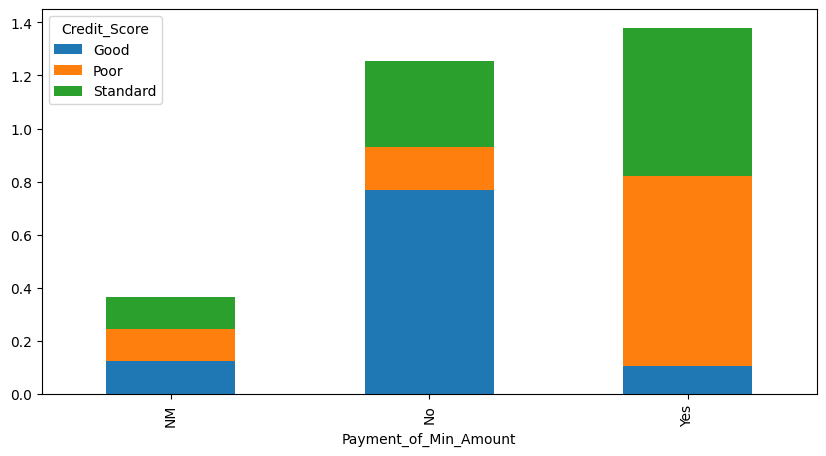

Credit_Score           Good_total  Poor_total  Standard_total  Good_percent  \
Payment_of_Min_Amount                                                         
NM                           2245        3518            6244          19.0   
No                          13671        4772           17224          38.0   
Yes                          1912       20708           29706           4.0   

Credit_Score           Poor_percent  Standard_percent  
Payment_of_Min_Amount                                  
NM                             29.0              52.0  
No                             13.0              48.0  
Yes                            40.0              57.0  
--------------------------------------------------
 
5. Credit_Score - Payment_Behaviour


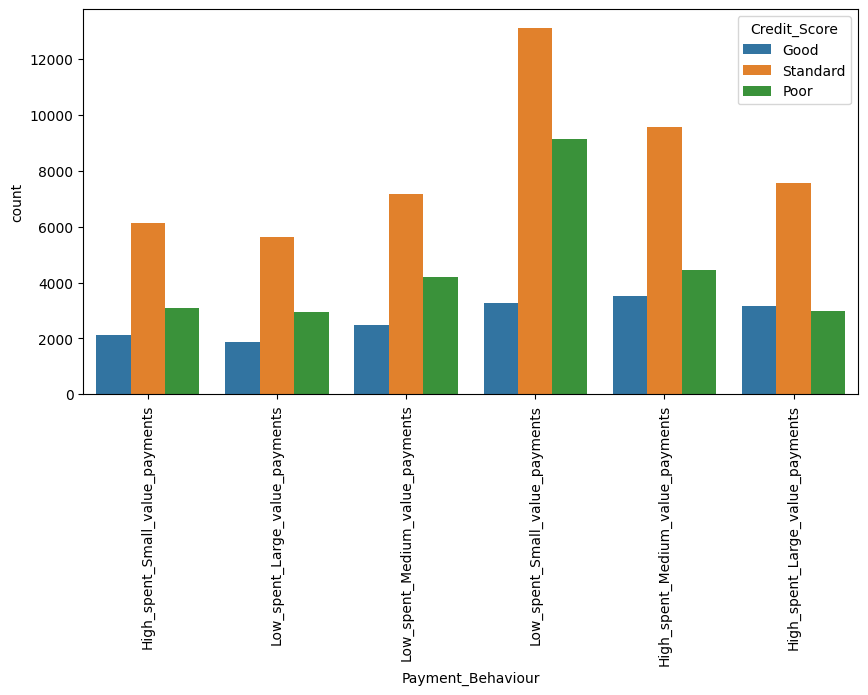

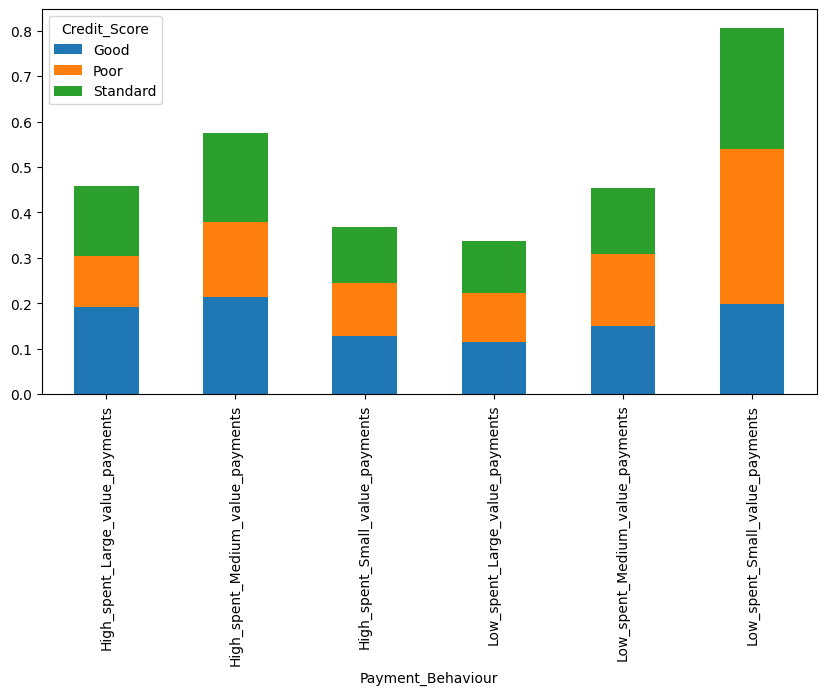

Credit_Score                      Good_total  Poor_total  Standard_total  \
Payment_Behaviour                                                          
High_spent_Large_value_payments         3172        2979            7570   
High_spent_Medium_value_payments        3524        4439            9577   
High_spent_Small_value_payments         2114        3088            6138   
Low_spent_Large_value_payments          1880        2931            5614   
Low_spent_Medium_value_payments         2482        4211            7168   
Low_spent_Small_value_payments          3273        9125           13115   

Credit_Score                      Good_percent  Poor_percent  Standard_percent  
Payment_Behaviour                                                               
High_spent_Large_value_payments           23.0          22.0              55.0  
High_spent_Medium_value_payments          20.0          25.0              55.0  
High_spent_Small_value_payments           19.0          27.0       

In [ ]:
for num, col in enumerate(cat,1):
    if (col != 'Credit_Score'):
        if (len(df[x].unique()) <= 16):
            print(f'{num}. Credit_Score - {col}')
            plt.figure(figsize=(10,5))
            sns.countplot(data=df, x=col, hue='Credit_Score')
            plt.xticks(rotation=90)
            plt.show()

            pd.crosstab(df[col], df['Credit_Score'], normalize='columns').plot(kind='bar', stacked=True,figsize=(10,5))
            plt.xticks(rotation=90)
            plt.show()
            a = pd.crosstab(df[col], df['Credit_Score'])
            b = pd.crosstab(df[col], df['Credit_Score'], normalize='index')
            c = a.join(round(b,2)*100, lsuffix='_total', rsuffix='_percent')
            print(c)
            print('-'*50)
            print(' ')

In [ ]:
df2 = pd.concat([df[df_num], df[cat]],axis=1)

In [ ]:
df2['Credit_Score'] = np.where(df2['Credit_Score']=='Good',0,np.where(df2['Credit_Score']=='Standard',1,2))

In [ ]:
df2

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Month,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,23.0,19114.12,1824.84,3,4,3,4,3,7.0,11.27,...,26.82,49.57,80.42,312.49,January,Scientist,NaN,No,High_spent_Small_value_payments,0
1,23.0,19114.12,NaN,3,4,3,4,-1,NaN,11.27,...,31.94,49.57,118.28,284.63,February,Scientist,Good,No,Low_spent_Large_value_payments,0
2,34.0,19114.12,NaN,3,4,3,4,3,7.0,NaN,...,28.61,49.57,81.70,331.21,March,Scientist,Good,No,Low_spent_Medium_value_payments,0
3,23.0,19114.12,NaN,3,4,3,4,5,4.0,6.27,...,31.38,49.57,199.46,223.45,April,Scientist,Good,No,Low_spent_Small_value_payments,0
4,23.0,19114.12,1824.84,3,4,3,4,6,NaN,11.27,...,24.80,49.57,41.42,341.49,May,Scientist,Good,No,High_spent_Medium_value_payments,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,39628.99,3359.42,4,6,7,2,23,7.0,11.50,...,34.66,35.10,60.97,479.87,April,Mechanic,NaN,No,High_spent_Large_value_payments,2
99996,25.0,39628.99,3359.42,4,6,7,2,18,7.0,11.50,...,40.57,35.10,54.19,496.65,May,Mechanic,NaN,No,High_spent_Medium_value_payments,2
99997,25.0,39628.99,3359.42,4,6,5729,2,27,6.0,11.50,...,41.26,35.10,24.03,516.81,June,Mechanic,Good,No,High_spent_Large_value_payments,2
99998,25.0,39628.99,3359.42,4,6,7,2,20,NaN,11.50,...,33.64,35.10,251.67,319.16,July,Mechanic,Good,No,Low_spent_Large_value_payments,1


# Train Test Split

In [ ]:
X = df2.drop('Credit_Score', axis=1)
y = df2['Credit_Score']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=42,
                                                    stratify=y,
                                                    test_size=0.2)

print(f'shape X_train: {X_train.shape}')
print(f'shape X_test: {X_test.shape}')
print(f'shape y_train: {y_train.shape}')
print(f'shape y_test: {y_test.shape}')

shape X_train: (80000, 21)
shape X_test: (20000, 21)
shape y_train: (80000,)
shape y_test: (20000,)


In [ ]:
X_train_enc = X_train.copy()
X_num = X_train_enc.select_dtypes('number').columns
X_cat = X_train_enc.select_dtypes('object').columns

In [ ]:
oe = OrdinalEncoder(handle_unknown='use_encoded_value', 
                    unknown_value=np.nan)

In [ ]:
# chuyển đổi chuỗi ký tự thành số 
X_train_enc[X_cat] = oe.fit_transform(X_train_enc[X_cat])

In [ ]:
# improve
knn = KNNImputer(n_neighbors=5)
X_train_imp = pd.DataFrame(knn.fit_transform(X_train_enc), 
                           columns=X_train_enc.columns)

In [ ]:
X_train_imp[X_cat] = oe.inverse_transform(X_train_imp[X_cat])

In [ ]:
ohe = OneHotEncoder(handle_unknown='ignore')
X_train_ohe = pd.DataFrame(ohe.fit_transform(X_train_imp[X_cat]).toarray(),
                           columns=ohe.get_feature_names_out(X_cat))

In [ ]:
ss = StandardScaler()
X_train_ss = pd.DataFrame(ss.fit_transform(X_train_imp[X_num]),
                          columns= X_num)

In [ ]:
X_train_trans = pd.concat([X_train_ss, X_train_ohe], axis=1)

In [ ]:
X_test_enc = X_test.copy()

X_test_enc[X_cat] = oe.transform(X_test_enc[X_cat])
X_test_imp = pd.DataFrame(knn.transform(X_test_enc), 
                          columns=X_train_enc.columns)

X_test_imp[X_cat] = oe.inverse_transform(X_test_imp[X_cat])
X_test_ohe = pd.DataFrame(ohe.transform(X_test_imp[X_cat]).toarray(),
                          columns=ohe.get_feature_names_out(X_cat))

X_test_ss = pd.DataFrame(ss.transform(X_test_imp[X_num]),
                         columns= X_num)

X_test_trans = pd.concat([X_test_ss, X_test_ohe], axis=1)

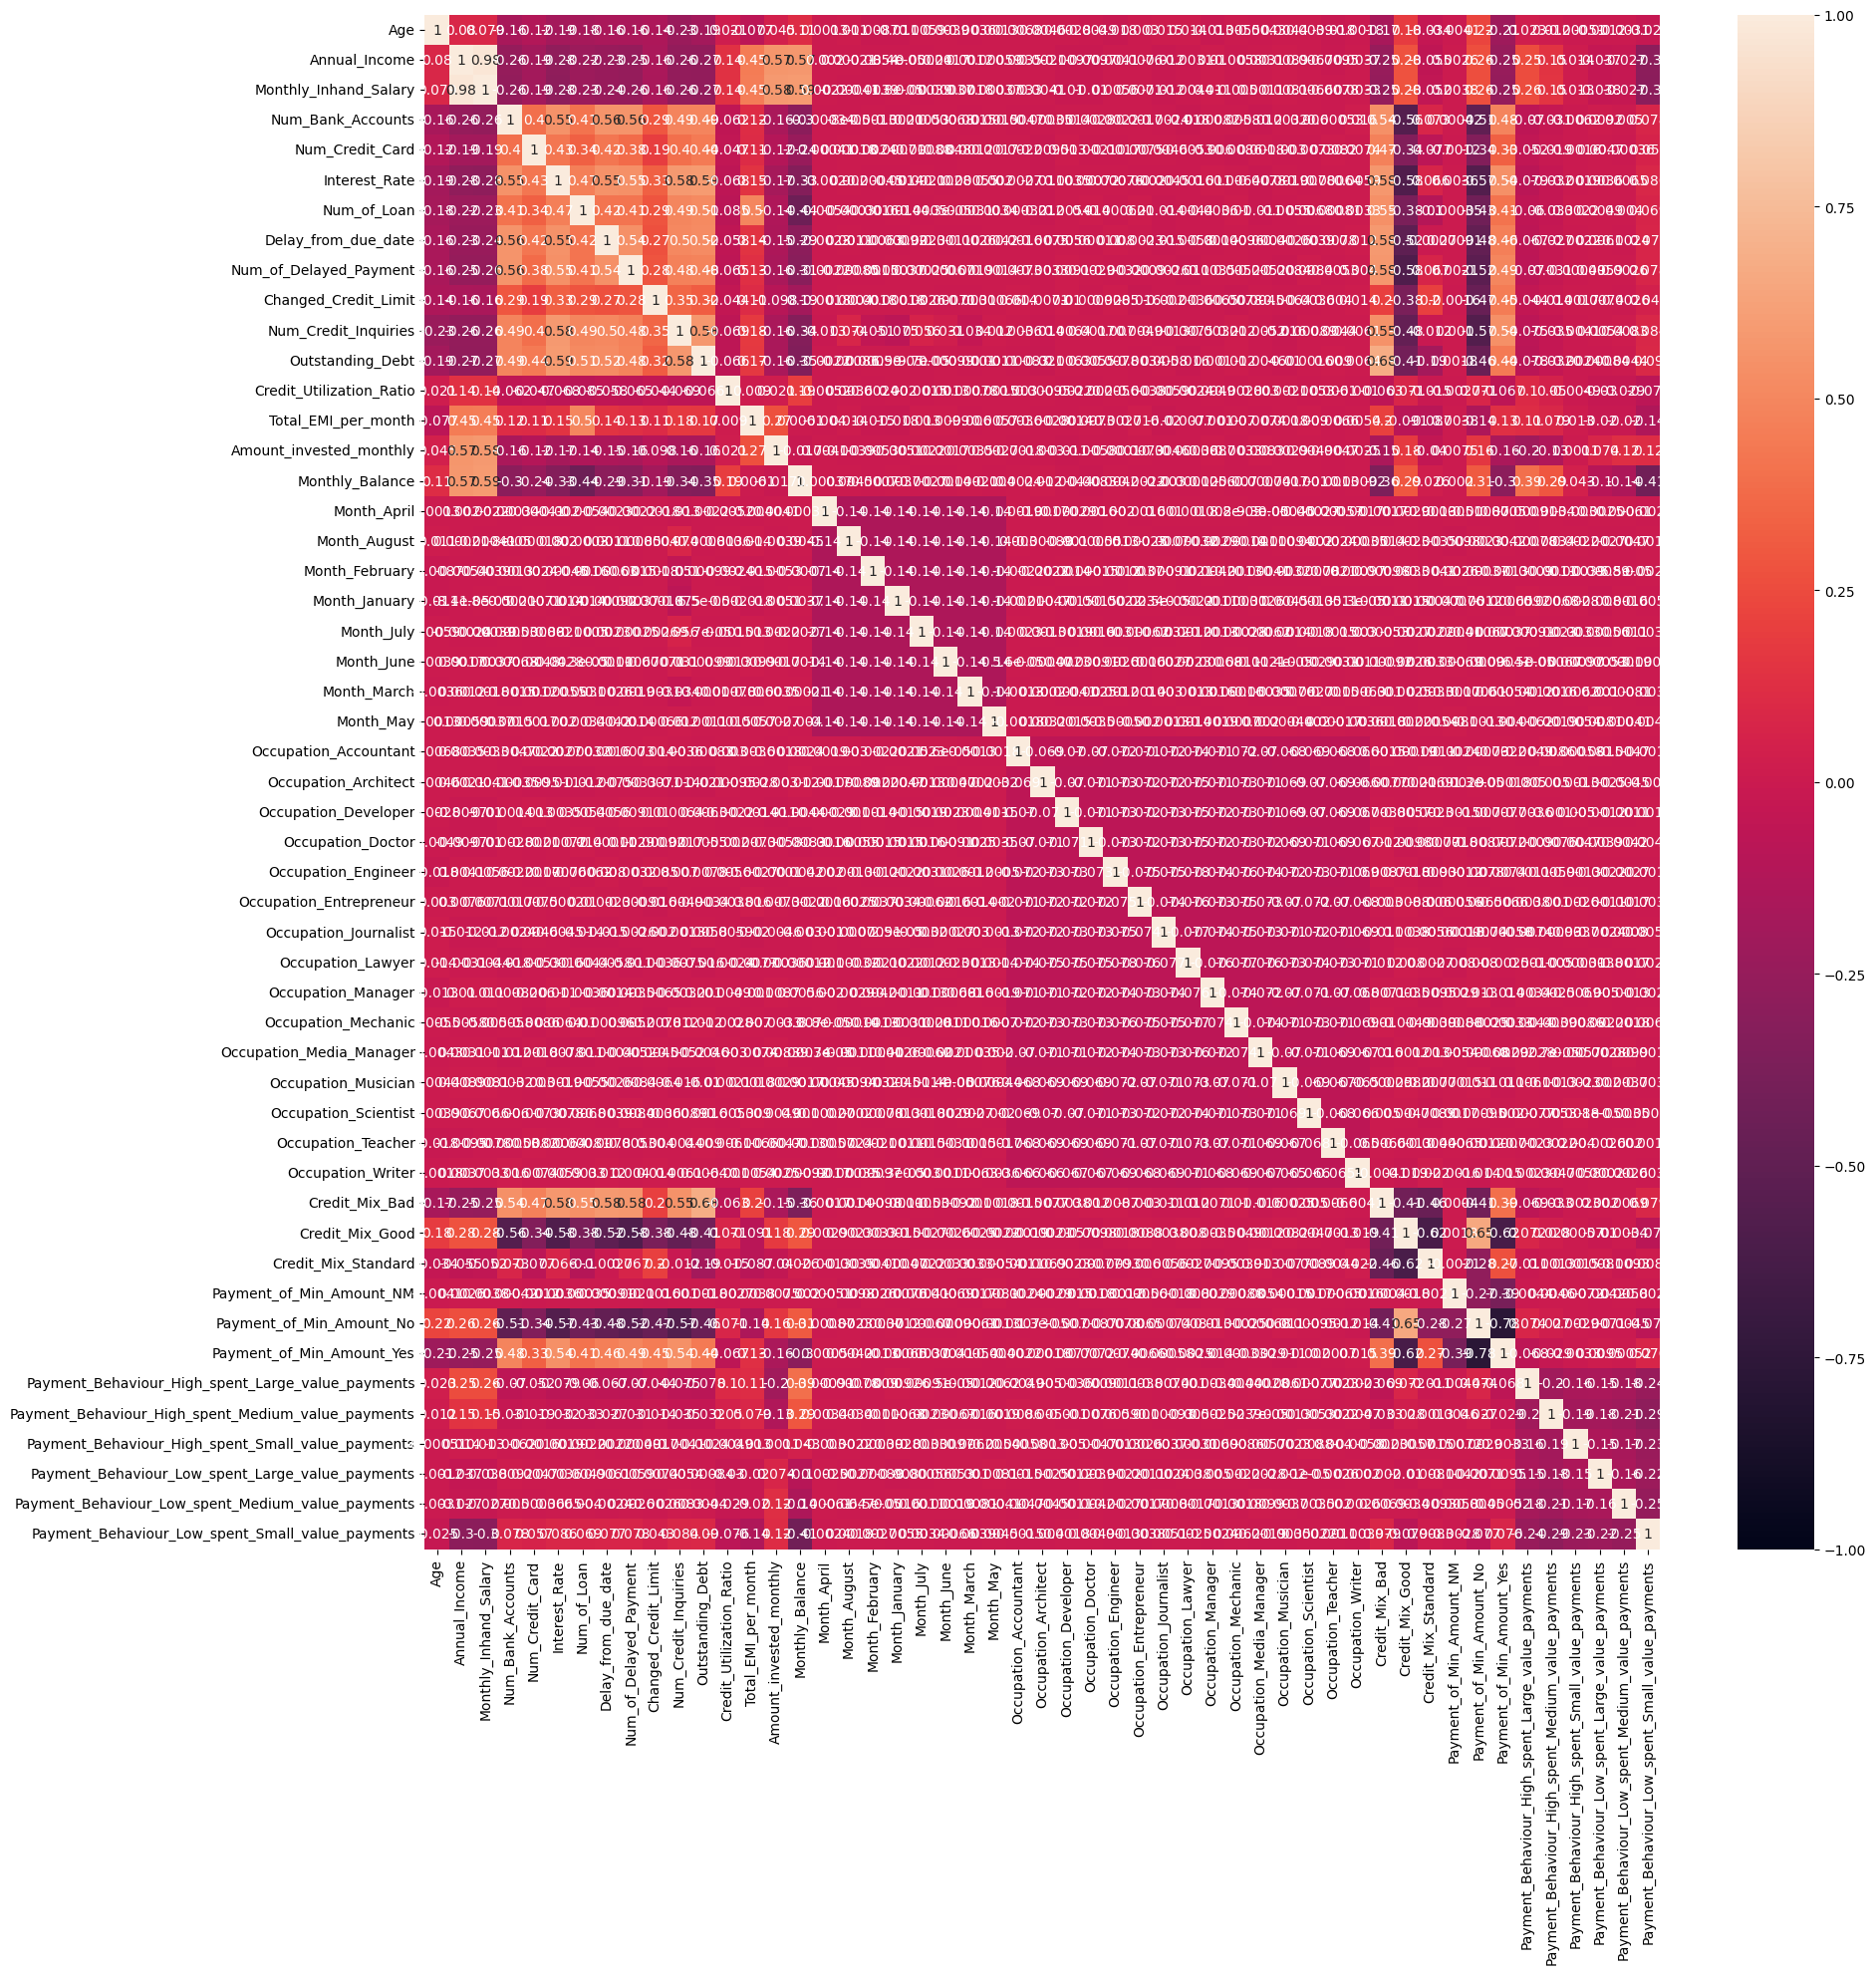

In [ ]:
plt.figure(figsize=(20,20))
corr = X_train_trans.corr(method='spearman')
sns.heatmap(corr,vmin=-1, vmax=1, annot=True)
plt.show()

# Feature Selection

In [ ]:
drop2 = []

for col1, col2 in comb(X_train_trans.columns, 2):
    if (col1 in norm_data) & (col2 in norm_data):
        pear, pval1 = st.pearsonr(X_train_trans[col1],X_train_trans[col2])
        if (pear > 0.8) | (pear < -0.8):
            drop2.append(col1)
    else:
        spear, pval2 = st.spearmanr(X_train_trans[col1],X_train_trans[col2])
        if (spear > 0.8) | (spear < -0.8):
            drop2.append(col1)

In [ ]:
len(drop2)

1

In [ ]:
X_train_trans.drop(drop2,axis=1,inplace=True)
X_test_trans.drop(drop2,axis=1,inplace=True)

In [ ]:
mi_col = pd.DataFrame({'col': X_train_trans.columns,
                       'mi':mutual_info_classif(X_train_trans, y_train, random_state=42)}) \
                        .sort_values('mi')
mi_col

,col,mi
21,Month_March,0.000000
18,Month_January,0.000000
46,Payment_Behaviour_High_spent_Small_value_payments,0.000000
45,Payment_Behaviour_High_spent_Medium_value_paym...,0.000000
22,Month_May,0.000000
20,Month_June,0.000000
23,Occupation_Accountant,0.000145
30,Occupation_Lawyer,0.000159
25,Occupation_Developer,0.000204
19,Month_July,0.000289


In [ ]:
sel = mi_col[mi_col['mi'] > 0.01]
X_train_trans = X_train_trans[sel['col']]
X_train_trans

,Age,Monthly_Balance,Credit_Mix_Standard,Num_of_Loan,Credit_Mix_Bad,Num_of_Delayed_Payment,Changed_Credit_Limit,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Num_Bank_Accounts,Num_Credit_Card,Num_Credit_Inquiries,Credit_Mix_Good,Delay_from_due_date,Interest_Rate,Total_EMI_per_month,Monthly_Inhand_Salary,Outstanding_Debt
0,0.061715,-0.823723,1.0,0.015396,0.0,-0.096230,0.786804,0.0,1.0,-0.119693,-0.135479,-0.123719,0.0,0.064245,-0.115773,-0.164107,-0.823345,-1.133591
1,-0.784200,2.571909,0.0,-0.047789,0.0,-0.073823,-0.016064,0.0,0.0,-0.077300,-0.127744,-0.128936,1.0,0.535178,-0.133022,-0.168647,1.248885,-0.948757
2,-0.784200,-0.362370,1.0,-0.016197,0.0,-0.066652,1.279171,0.0,1.0,-0.085778,-0.120009,-0.087199,0.0,-0.070307,-0.102836,-0.165531,-0.928644,0.995226
3,-0.972181,0.251752,0.0,-0.016197,0.0,-0.136563,-0.039722,1.0,0.0,-0.111214,-0.166419,-0.134153,1.0,-1.752208,-0.137334,-0.161855,-0.357865,-1.131957
4,-0.972181,-0.706874,0.0,0.062785,1.0,-0.069341,-0.641503,0.0,1.0,-0.060343,-0.135479,-0.087199,0.0,0.938834,-0.104992,-0.124642,-0.589223,0.542602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,-0.126266,-0.982627,1.0,0.031192,0.0,-0.073823,-0.094429,0.0,0.0,-0.119693,-0.112274,-0.076765,0.0,-0.003031,-0.085587,-0.159438,-0.876698,0.525433
79996,-0.878191,-0.965533,0.0,0.046988,1.0,-0.055897,-0.076686,0.0,0.0,-0.068821,-0.135479,-0.102850,0.0,0.333349,-0.107148,-0.162817,-0.919524,0.648944
79997,0.155706,-0.339047,1.0,-0.016197,0.0,3.272919,-1.470986,0.0,1.0,-0.102736,-0.127744,-0.123719,0.0,0.602454,-0.100680,-0.165370,-0.850614,0.482506
79998,0.907631,-0.512938,1.0,0.046988,0.0,-0.082785,-0.171907,0.0,1.0,-0.102736,-0.143214,-0.108067,0.0,-0.608515,-0.122241,-0.162306,-0.872093,-0.039200


In [ ]:
X_test_trans = X_test_trans[sel['col']]
X_test_trans

,Age,Monthly_Balance,Credit_Mix_Standard,Num_of_Loan,Credit_Mix_Bad,Num_of_Delayed_Payment,Changed_Credit_Limit,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Num_Bank_Accounts,Num_Credit_Card,Num_Credit_Inquiries,Credit_Mix_Good,Delay_from_due_date,Interest_Rate,Total_EMI_per_month,Monthly_Inhand_Salary,Outstanding_Debt
0,-1.724106,0.500389,0.0,-0.000400,0.0,-0.051415,0.117008,0.0,1.0,-0.085778,-0.120009,-0.087199,1.0,1.275214,-0.117929,4.891114,0.405469,0.931057
1,-0.596219,0.033885,0.0,-0.031993,0.0,-0.127600,-0.044157,1.0,0.0,-0.145128,-0.143214,-0.108067,1.0,-1.146723,-0.145958,-0.167448,-0.714475,-0.414353
2,0.813640,2.450705,0.0,-0.047789,0.0,-0.073823,-0.869205,1.0,0.0,-0.119693,-0.143214,-0.123719,1.0,-0.272135,-0.128709,-0.168647,1.155977,-0.140353
3,-0.408238,-0.511393,0.0,-1.627418,1.0,-0.042452,-1.209278,0.0,1.0,-0.094257,-0.120009,-0.092416,0.0,1.140662,-0.089900,-0.160530,-0.727097,1.074523
4,0.907631,-0.057627,1.0,0.046988,0.0,-0.082785,0.378716,0.0,1.0,-0.085778,-0.135479,-0.102850,0.0,-0.204859,-0.126553,-0.148385,0.200256,0.659920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1.753547,-0.027420,1.0,-0.031993,0.0,-0.078304,0.034207,1.0,0.0,-0.085778,-0.127744,-0.144587,0.0,0.400625,-0.113617,-0.167044,-0.570750,-0.164960
19996,1.377584,-0.256106,1.0,0.015396,0.0,-0.087267,-0.467031,1.0,0.0,-0.119693,-0.150949,-0.128936,0.0,-0.339411,-0.143802,2.729476,-0.795526,-0.629045
19997,-0.596219,-0.691981,1.0,0.031192,0.0,-0.073823,0.226423,0.0,1.0,-0.077300,-0.127744,-0.081982,0.0,1.813422,-0.122241,-0.165998,-1.151422,0.593900
19998,0.249697,0.068400,0.0,0.046988,1.0,10.600973,-1.204842,0.0,1.0,-0.094257,-0.135479,-0.092416,0.0,0.804282,-0.081275,-0.134445,0.717602,0.762596


# KNN

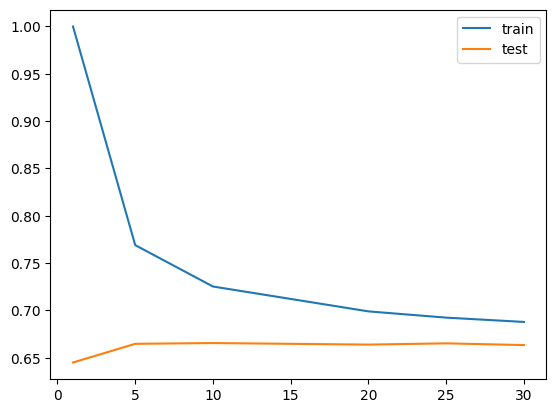

10

In [ ]:
x = [1, 5, 10, 20, 25, 30]
train = []
test = []

for val in x:
    knn2 = KNeighborsClassifier(n_neighbors=val)
    cv = cross_validate(knn2, X_train_trans, y_train, return_train_score=True)
    train.append(cv['train_score'].mean())
    test.append(cv['test_score'].mean())

sns.lineplot(x=x, y=train, label='train')
sns.lineplot(x=x, y=test, label='test')
plt.show()

x[np.argmax(test)]

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_trans, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_predict = knn.predict(X_test_trans)

In [ ]:
# Danh gia mo hinh
scores = cross_val_score(knn, X_test_trans, y_test, cv=5)
tb_scores = np.mean(scores)
print(tb_scores*100)

63.93


# Decision tree

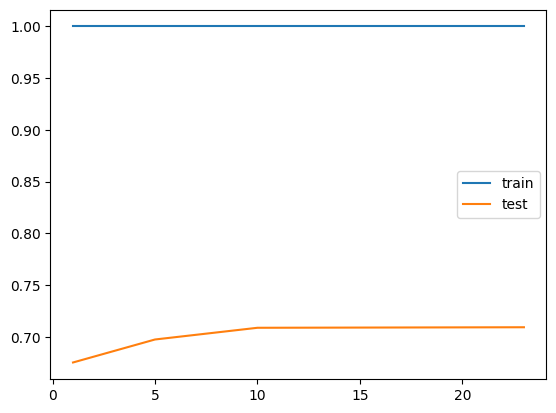

23

In [ ]:
# find max_features
x = [1,5,10,23]
train = []
test = []

for val in x:
    tree2 = DecisionTreeClassifier(random_state=42,
                                     max_features=val)
    cv = cross_validate(tree2, X_train_trans, y_train, return_train_score=True)
    train.append(cv['train_score'].mean())
    test.append(cv['test_score'].mean())

sns.lineplot(x=x, y=train, label='train')
sns.lineplot(x=x, y=test, label='test')
plt.show()

x[np.argmax(test)]

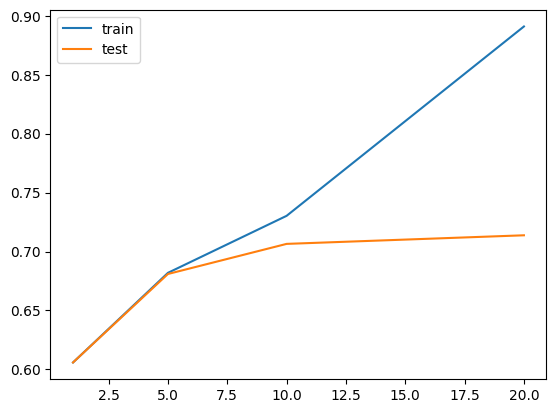

20

In [ ]:
# max_depth
x = [1,5,10,20]
train = []
test = []

for val in x:
    tree2 = DecisionTreeClassifier(random_state=42,
                                   max_features=23,
                                   max_depth=val)
    cv = cross_validate(tree2, X_train_trans, y_train, return_train_score=True)
    train.append(cv['train_score'].mean())
    test.append(cv['test_score'].mean())

sns.lineplot(x=x, y=train, label='train')
sns.lineplot(x=x, y=test, label='test')
plt.show()

x[np.argmax(test)]

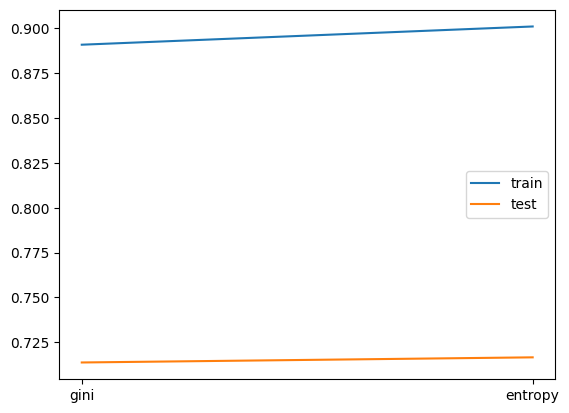

'entropy'

In [ ]:
# criterion
x = ['gini', 'entropy']
train = []
test = []

for val in x:
    tree2 = DecisionTreeClassifier(random_state=42,
                                   max_features=23,
                                   max_depth=20,
                                   criterion = val)
    cv = cross_validate(tree2, X_train_trans, y_train, return_train_score=True)
    train.append(cv['train_score'].mean())
    test.append(cv['test_score'].mean())

sns.lineplot(x=x, y=train, label='train')
sns.lineplot(x=x, y=test, label='test')
plt.show()

x[np.argmax(test)]

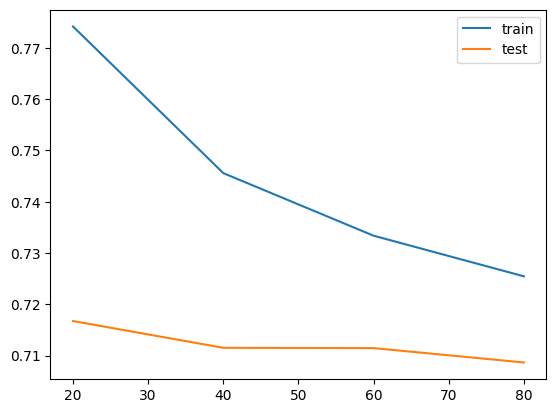

20

In [ ]:
# min_samples_leaf
x = [20,40,60,80]
train = []
test = []

for val in x:
    tree2 = DecisionTreeClassifier(random_state=42,
                                   max_features=23,
                                   max_depth=20,
                                   criterion= 'entropy',
                                   min_samples_leaf=val)
    cv = cross_validate(tree2, X_train_trans, y_train, return_train_score=True)
    train.append(cv['train_score'].mean())
    test.append(cv['test_score'].mean())

sns.lineplot(x=x, y=train, label='train')
sns.lineplot(x=x, y=test, label='test')
plt.show()

x[np.argmax(test)]

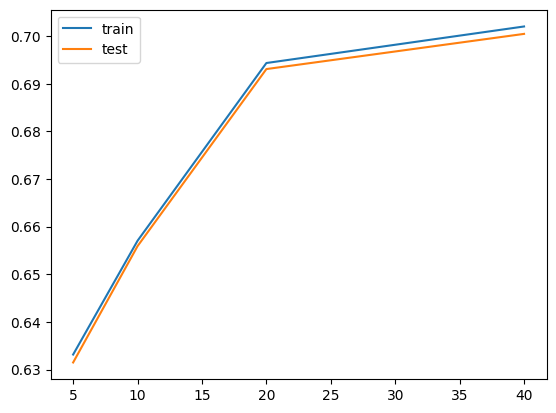

40

In [ ]:
# max_leaf_nodes
x = [5,10,20,40]
train = []
test = []

for val in x:
    tree2 = DecisionTreeClassifier(random_state=42,
                                   max_features=23,
                                   max_depth=20,
                                   min_samples_leaf=20,
                                   criterion= 'entropy',
                                   max_leaf_nodes=val)
    cv = cross_validate(tree2, X_train_trans, y_train, return_train_score=True)
    train.append(cv['train_score'].mean())
    test.append(cv['test_score'].mean())

sns.lineplot(x=x, y=train, label='train')
sns.lineplot(x=x, y=test, label='test')
plt.show()

x[np.argmax(test)]

In [ ]:
dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth = 20, max_features= 23, min_samples_leaf = 20, max_leaf_nodes=40)
dtc.fit(X_train_trans, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features=23,
                       max_leaf_nodes=40, min_samples_leaf=20)

In [ ]:
y_pred = dtc.predict(X_test_trans)

In [ ]:
# Danh gia mo hinh
dtc_acc = accuracy_score(y_test, y_pred)
print(dtc_acc)

0.6998


In [ ]:
# Danh gia mo hinh
scores = cross_val_score(dtc, X_test_trans, y_test, cv=5)
tb_scores = np.mean(scores)
print(tb_scores*100)

69.17999999999999
